In [23]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [24]:
secretnumber = '11101001'

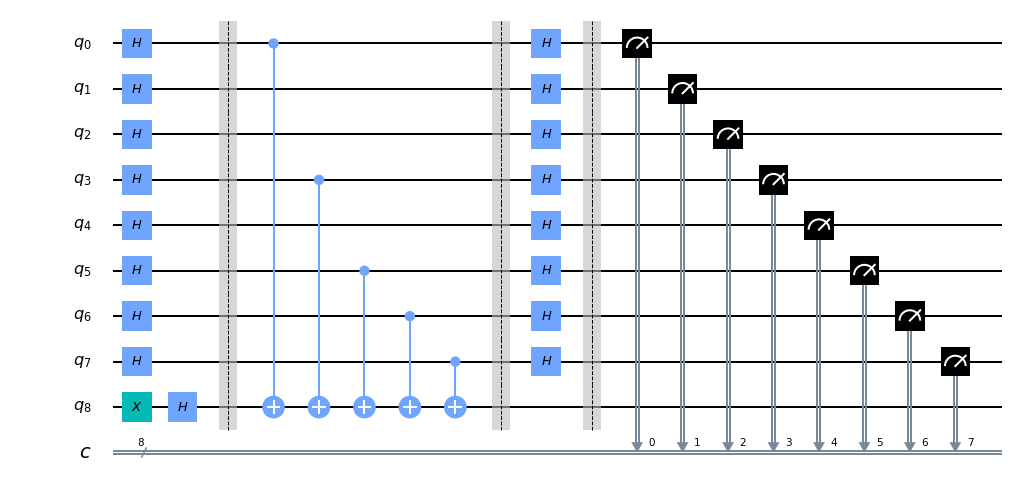

In [25]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

#circuit.cx(5,len(secretnumber))
#circuit.cx(3,len(secretnumber))
#circuit.cx(0,len(secretnumber))
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))

circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

circuit.draw(output='mpl')

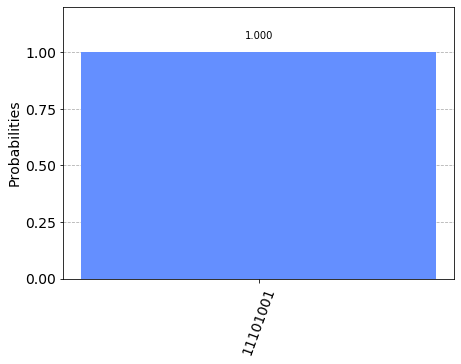

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots = 1).result()
counts = result.get_counts()
plot_histogram(result.get_counts(circuit))